# Logistic Regression Implementation - from scratch !

- In this implementation, I've build the general architecture of a learning algorithm, according to the logistic regression function, including:
    - Initializing parameters.
    - Calculating the cost function and its gradient.
    - Providing a method for Calculating the accuracy and loss metrics, when verbosity is on.
    - Using an optimization algorithm (gradient descent) for the back propagation.
    - Vectorized Calculations for optimizing the execution time.
    - A demo for showing how it works !

*Note : This implementation was made for learning purposes, it's not meant to be used in a real-world application, at least for the moment!*    

# 1. Loading the implementation

In [9]:
!git clone https://github.com/taherromdhane/logistic-regression-implementation.git

Cloning into 'logistic-regression-implementation'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 41 (delta 24), reused 30 (delta 13), pack-reused 0
Unpacking objects: 100% (41/41), done.


In [10]:
%cd logistic-regression-implementation/

/content/logistic-regression-implementation


# 2. Loading the dataset

we first load some libraries we'll need later

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

We load the digits dataset from the sklearn library. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset. 

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

We visualize some of the elements to see what we'll be working on. It usually helps to visualize your data prior to working with it to get a feel for the required work.

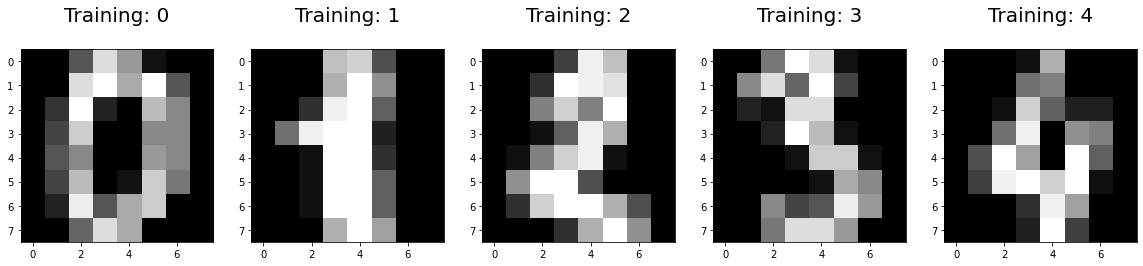

In [13]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data.

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

We see that we have 1797 images in total. This is not much but for the sake of this demo it's enough to show how the model functions.

In [15]:
print(x_train.shape)
print(x_test.shape)

(1347, 64)
(450, 64)


# 3. Preprocessing the Data

We one-hot encode the data, which means we create a column for each value in the target classes, and we put 1 for a certain sample if it corresponds to that target class, else we put 0. This is necessary for the logistic regression model. 

In [0]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])

In [0]:
y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)

This is an example of on-hot encoding, we can see that the first target is 2, so we put a '1' in the corresponding column, and so on for the other ones.

In [33]:
y_train[:10, ]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

# 4. Training the model

Here we fit the model to the data, or in another terms 'train' it on the training data. The parameters that we can specify for the moment are the 'learning_rate' and the 'loss' metric (which depends on wether it's a multi-classification problem or a binary-classification one).
For the 'fit' method, the 'epochs' denote how many iterations the model will make, the 'verbose' is after how many epochs it will print the metrics as well as the cost values (in order to monitor the performance of the model). Finally, the 'metrics' is an array that has the metrics it will take into account.

In [20]:
from logistic_regression import LogisticRegression
logreg = LogisticRegression(learning_rate = 0.002, loss='categorical_crossentropy')
history = logreg.fit(x_train, y_train, x_test, y_test, epochs=2000, verbose=100, metrics=['accuracy', 'loss'])

epoch 0 ==============
Cost : 6.931471805599452 , train_accuracy : 78.09948032665181 , val_accuracy : 73.55555555555556 , train_loss : 3.178669616581665 , val_loss : 1.064138284913836 , 
epoch 100 ==============
Cost : 1.0019029806315936 , train_accuracy : 93.3184855233853 , val_accuracy : 92.22222222222223 , train_loss : 0.9974691248234274 , val_loss : 0.347555087691965 , 
epoch 200 ==============
Cost : 0.7429246354422483 , train_accuracy : 94.80326651818856 , val_accuracy : 93.55555555555556 , train_loss : 0.7413971557225089 , val_loss : 0.261892603506192 , 
epoch 300 ==============
Cost : 0.6319031027760252 , train_accuracy : 95.32293986636971 , val_accuracy : 94.0 , train_loss : 0.6310941264705995 , val_loss : 0.22545495872762944 , 
epoch 400 ==============
Cost : 0.5673001386149887 , train_accuracy : 95.39717891610988 , val_accuracy : 95.11111111111111 , train_loss : 0.5667837585864851 , val_loss : 0.20457616889379654 , 
epoch 500 ==============
Cost : 0.5238276934491689 , train_

# 5. Visualizing the performance of the model

The fit method returns a history object which holds the metric values on each epoch. We'll use it to visualize the model's performance.

In [22]:
history.keys()

dict_keys(['train_accuracy', 'val_accuracy', 'train_loss', 'val_loss'])

We define an axis for the epochs.

In [0]:
epochs = range(0, 2000, 100)

Here we plot the accuracy for the training and validation sets as well as the loss metrics for both. This helps us see the performance of the model, which we can use to optimize the hyperparameters for example and analyzes where our model did wrong.

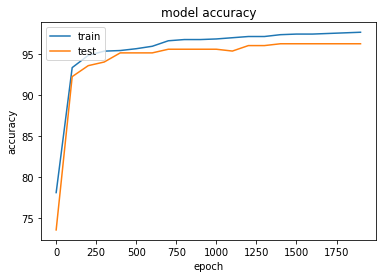

In [24]:
plt.plot(epochs, history['train_accuracy'])
plt.plot(epochs, history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

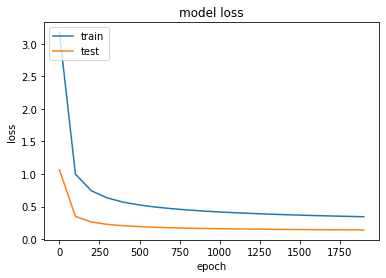

In [25]:
plt.plot(epochs, history['train_loss'])
plt.plot(epochs, history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Here we assess the final accuracy and loss of the model on the "test set" (here it's the same as the validation set, but it shouldn't be the case)

In [26]:
predictions = logreg.predict(x_test)
acc = logreg.accuracy_score(predictions, y_test)
predictions_proba = logreg.predict_proba(x_test)
loss = logreg.loss(predictions_proba, y_test)

print("Accuracy : {}, Loss : {}".format(acc, loss))

Accuracy : 89.11111111111111, Loss : 0.1394020019271515


The confusion matrix allows us to go more in detail for classification problems, to see which labels the model misinterprets as others. This can be used to calculate precision, recall and f1-score which are much more good measures for classification problems since accuracy can be a misleading metric. 

In [0]:
import seaborn as sns
from sklearn import metrics

In [0]:
y_test_cat = np.argmax(y_test, axis=1)
predictions_cat = np.argmax(predictions, axis=1)

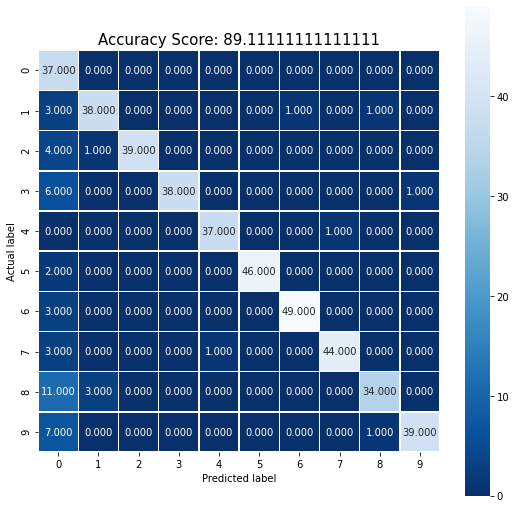

In [34]:
cm = metrics.confusion_matrix(y_test_cat, predictions_cat)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);